# Intro to ANNs

Artificial Neural Networks are inspired in Biological Neural Networks (how the neurons work & are connected in an animal brain)

<div>
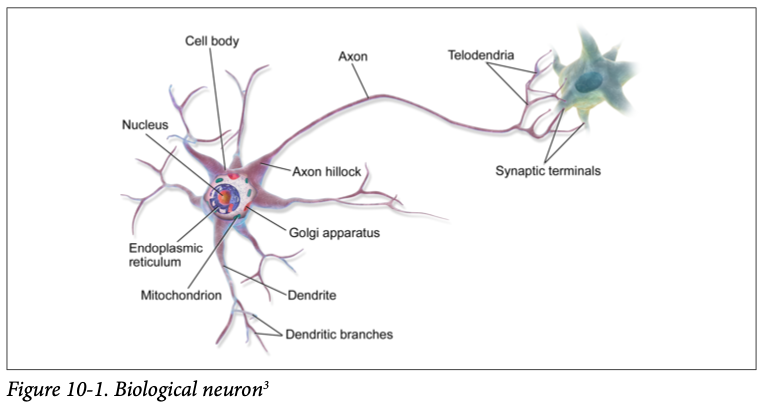
</div>

When mapped it can be seen that neurons are organised in consecutive layers.

<div>
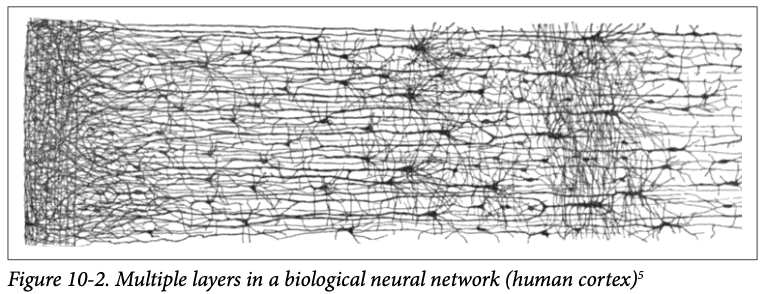
</div>

## Logical Computation with Neurons

A simple model of the biological neuron, which later became known as an artificial neuron: it has one or more binary (on/off) inputs and one binary output. 

The artificial neuron simply activates its output when more than a certain number of its inputs are active.

<div>
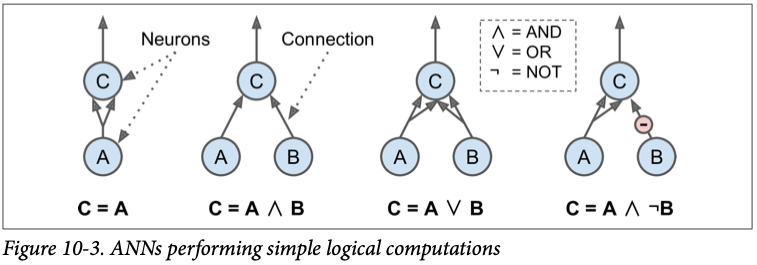
</div>

> **Assuming that a neuron is activated when at least two of its inputs are active** 👇:

- The first network on the left is simply the identity function: if neuron A is activated, then neuron C gets activated as well (since it receives two input signals from neuron A), but if neuron A is off, then neuron C is off as well.


- The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated (a single input signal is not enough to activate neuron C).


- The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).


- Finally, if we suppose that an input connection can inhibit the neuron’s activity (which is the case with biological neurons), then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and if neuron B is off. If neuron A is active all the time, then you get a logical NOT: neuron C is active when neuron B is off, and vice versa.

## The Perceptron

The Perceptron is one of the simplest ANN architectures.

> - The inputs and outputs are numvers
- It has a TLU (Threshold Logic Unit)
- The TLU computes a weighted sum of its inputs ( z = w1x1 + w2x2 + ... + wnxn) then applies a "setp function"

### TLU (in a Binary classification example)

<div>
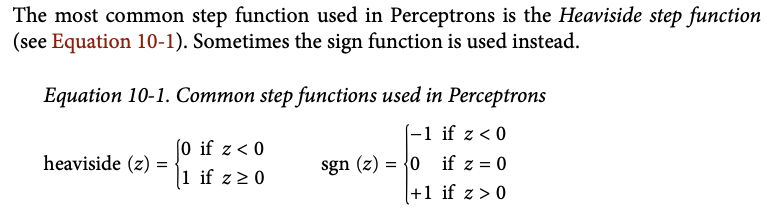
</div>

In the case of a linear binary classification problem: 

- It comutes a linear combination of the inputs and if the results exceeds a threshold, it outputs positive, otherwise negative

> Training a TLU means finding the right values for w0, w1, ... wn

<div>
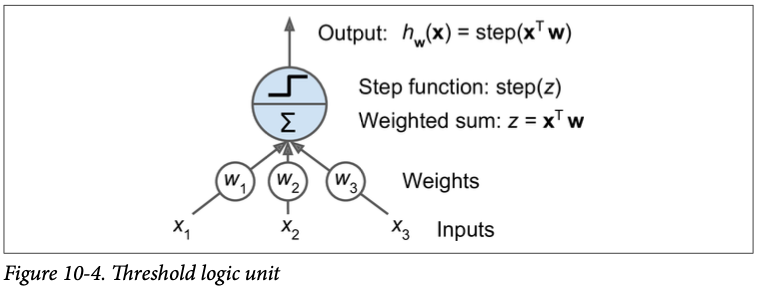
</div>

### Multiclass classification example

- A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. 


- When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), it is called a **fully connected layer or a dense layer**. 


- To represent the fact that each input is sent to every TLU, it is common to draw special passthrough neurons called input neurons: they just output whatever input they are fed. All the input neurons form the input layer.


- Moreover, an extra bias feature is generally added (x0 = 1): it is typically represented using a special type of neuron called a bias neuron, which just outputs 1 all the time. 


- A Perceptron with two inputs and three outputs is represented in Figure 10-5. This Perceptron can classify instances simultaneously into three different binary classes, which makes it a multioutput classifier.

<div>
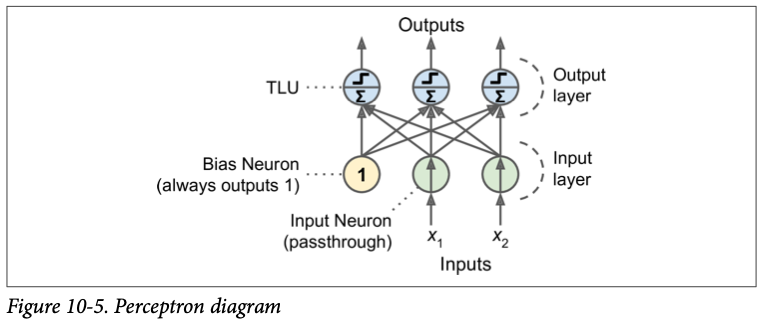
</div>

## Updating the weights


<div>
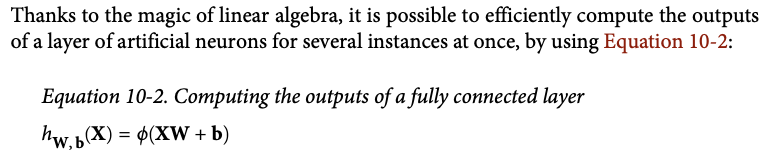
</div>

- As always, X represents the matrix of input features. It has one row per instance, one column per feature.


- The weight matrix W contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artifi‐ cial neuron in the layer.


- The bias vector b contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.


- The function φ is called the **activation function**: when the artificial neurons are TLUs, it is a step function (but we will discuss other activation functions shortly).

> 🔥 This looks like **Stochastic Gradient Descent** 👇

> - The Perceptron learning algorithm strongly resembles Stochastic Gradient Descent. In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regu‐ larization).


> - However contrary to Logistic Regression Classifiers, Perceptrons do not output probabiliies, rather they make predictions on hard thresholds. (In many cases is preferred probabilities)

<div>
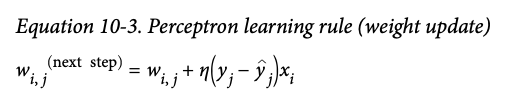
</div>

- wi, j is the connection weight between the ith input neuron and the jth output neuron.


- xi is the ith input value of the current training instance.


- y j is the output of the jth output neuron for the current training instance.


- yj is the target output of the jth output neuron for the current training instance.


- η is the learning rate.



## Multilayer Perceptron

Some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a **Multilayer Perceptron**.

> In particular, an MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the right of Figure 10-6: with inputs (0, 0) or (1, 1) the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1. All connections have a weight equal to 1, except the four connections where the weight is shown.

<div>
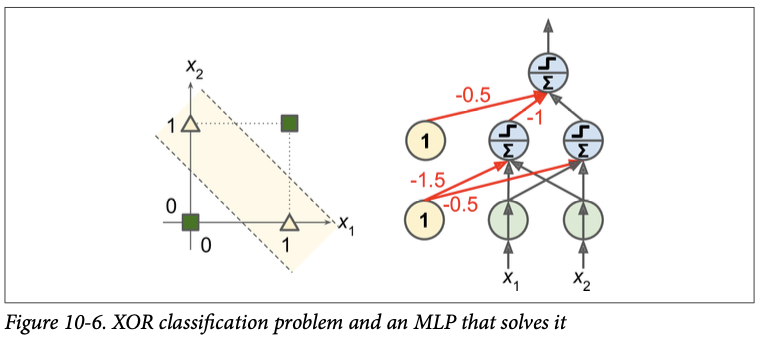
</div>

> 🔥 An MLP is composed of:
- one (passthrough) input layer, 
- one or more layers of TLUs, called hidden layers, 
- and one final layer of TLUs called the output layer (see Figure 10-7). 


The layers close to the input layer are usually called the lower layers, and the ones close to the outputs are usually called the upper layers. Every layer except the output layer includes a bias neuron and is fully connected to the next layer.

<div>
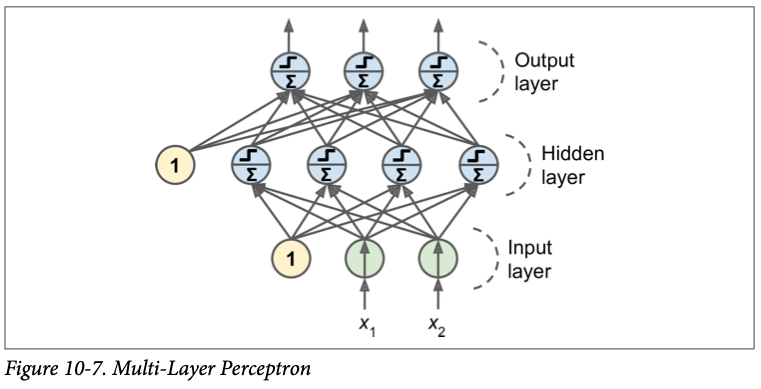
</div>

## Backpropagation

In order to train Neural Networks, the **backpropagation** alogrithm was invented:

> In short, it is simply Gradient Descent using an efficient technique for computing the gradients automatically:
- in just two passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regards to every single model parameter. 
- In other words, it can ⚠️ **find out how each connection weight and each bias term should be tweaked in order to reduce the error**. 
- Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

### Reverse-mode Autodiff

Reverse-model Autodiff is the solution implemented by TensorFlow to train the NN. It first goes through the graph in the forward direction (inputs to outputs) to compute the value of each node. Then it does a second pass, this time in the reverse direction (outputs to inputs), to compute all the partial derivatives.


When training Neural Network, we generally want to minimise the loss, so there is a single output (the loss) and hence only two passes through the graph are needed to compute the gradients.

>  **For each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step)**.

Steps:

1. It handles one mini-batch at a time (for example containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch, as we saw in Chapter 4.


2. Each mini-batch is passed to the network’s input layer, which just sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). 


3. The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. **This is the forward pass**: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.


4. Next, 🔥 **the algorithm measures the network’s output error** (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).


5. Then it **computes how much each output connection contributed to the error**. This is done analytically by simply applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.


6. The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule and so on until the algorithm reaches the input layer. As we explained earlier, ⚠️ **this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network** ⚠️ (hence the name of the algorithm).


7. Finally, **the algorithm performs a Gradient Descent step to tweak all the connection weights in the network**, using the error gradients it just computed.

It is important to **initialize all the hidden layers’ connection weights randomly**, or else training will fail. For example, if you initialize all weights and biases to zero, then all neurons in a given layer will be perfectly identical, and thus backpropagation will affect them in exactly the same way, so they will remain identical. In other words, despite having hundreds of neurons per layer, your model will act as if it had only one neuron per layer: it won’t be too smart. 

> 🔥 If you randomly initialize the weights, you break the symmetry and allow backpropagation to train a diverse team of neurons.

### Activation Functions

> Why do we need activation functions in the first place? 
- Well, if you chain several linear transformations, all you get is a linear transformation. For example, say f(x) = 2 x + 3 and g(x) = 5 x - 1, then chaining these two linear functions gives you another linear function: f(g(x)) = 2(5 x - 1) + 3 = 10 x + 1. 
- So if you don’t have some non-linearity between layers, then even a deep stack of layers is equivalent to a single layer: you cannot solve very complex problems with that.
- Conversely, a large enough DNN w nonlinear activations can theoretically approximate any continuous function.

In order for the MLP work correctly, the oritignal "Step" activation function was replaced with the logistic (sigmoid) function. This was essential because the step function contains only flat segments, so there is no Gradient to work with.

The logistic function has well-defined nonzero derivatives everywhere, allowing Gradient Descent to make some progress at every step. 

<div>
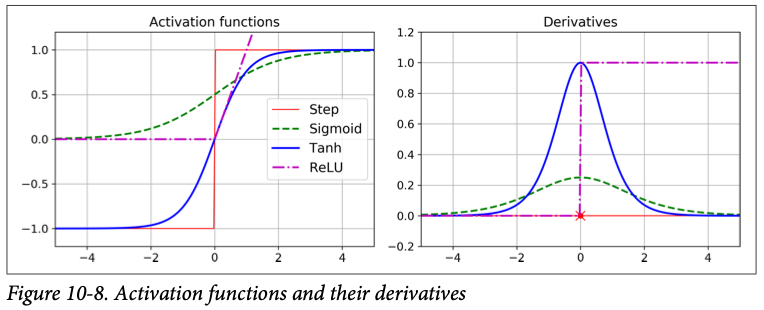
</div>

#### Step function

It only contains flat segments so there is no gradient to work with!

#### logit or Sigmoid

Logistic Function with inputs varying from 0 to 1. 

#### tanh 

Hyperbolic tangent function with inputs varying from -1 to 1. S-shaped.

#### relu

Rectified Linear Unit function. It has no maximum output value which helps reduce some issues during Gradient Descent.